In [13]:
import pandas as pd
import numpy as np
import missingno as msno
import pandas_profiling

# importing libraries for vis-n
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

---
## Objectives
---

1. “The only essence that we consume is energy, measured in DSML units…Our populace is widespread and we live across many different star clusters and galaxies. What we need now is to optimize our well-being across all those galaxies… We have a lot of data but our сomputers and methods are too weak – we urgently need your data science knowledge to help us”

2. · To understand what makes us better off.

3. Use our data and train your model to predict this index with the highest possible level of certainty.

4. To achieve the highest possible level of well-being through optimized allocation of additional energy

---
- Notes

- · no one galaxy will consume more than 100 zillion DSML 
and 
-  at least 10% of the total energy will be consumed by galaxies in need with existence expectancy index below 0,7.
- The solutions are evaluated on two criteria: predicted future Index values and allocated energy from a newly discovered star
1. Index predictions are evaluated using RMSE metric
2. Energy allocation is also evaluated using RMSE metric and has a set of known factors that need to be taken into account.
3. Every galaxy has a certain limited potential for improvement in the index described by the following function:
4. Potential for increase in the Index = -np.log(Index+0.01)+3
5. Likely index increase dependent on potential for improvement and on extra energy availability is described by the following function:
6. Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000

7. Leaderboard is based on a combined scaled metric:
- 80% prediction task RMSE + 20% optimization task RMSE * lambda where lambda is a normalizing factor

In [2]:
df = pd.read_csv('test.csv')

In [ ]:
pandas_profiling.ProfileReport(df)

In [264]:
df.describe(include='all')

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
count,8.900000e+02,890,885.000000,885.000000,885.000000,885.000000,885.000000,882.000000,882.000000,882.000000,...,606.000000,560.000000,560.000000,560.000000,549.000000,549.000000,519.000000,482.000000,536.000000,529.000000
unique,NaN,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"Wolf-Lundmark-Melotte (WLM, DDO 221)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.011498e+06,NaN,0.923881,79.938370,33655.513114,0.856869,16.037675,11.229365,0.845626,0.801581,...,8.936240,0.848007,0.862777,1.015743,128.712080,128.635268,20.640391,6.036133,23.274262,0.563059
std,2.881505e+03,NaN,0.134856,9.051945,18940.572797,0.186299,3.170799,3.333436,0.164942,0.192220,...,2.610288,0.185827,0.151898,0.100165,48.871212,48.684267,15.365777,4.157453,13.787944,0.203167
min,1.007012e+06,NaN,0.456086,51.562543,734.072777,0.357646,6.902194,3.224037,0.452401,0.268006,...,2.820374,0.180104,0.491085,0.319004,6.740082,18.526901,-62.918138,-0.455652,-74.254897,0.139063
25%,1.009020e+06,NaN,0.834118,73.863054,21276.527313,0.710236,13.711596,8.634776,0.711922,0.648948,...,7.037902,0.711255,0.739310,0.970260,88.348928,90.098284,14.394432,4.075216,16.943013,0.380811
50%,1.011030e+06,NaN,0.944683,81.471317,28264.476530,0.868819,16.269818,11.274397,0.863623,0.817313,...,8.685332,0.879984,0.888459,1.039880,129.450600,130.491213,21.599869,5.185122,23.714018,0.569413
75%,1.014049e+06,NaN,1.022712,86.426984,41130.714108,0.997650,18.272034,14.067355,0.977608,0.953022,...,10.769263,0.995167,0.976561,1.079805,169.529106,168.104504,28.811899,6.601704,30.746076,0.733748


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 79 columns):
galactic year                                                                              890 non-null int64
galaxy                                                                                     890 non-null object
existence expectancy index                                                                 885 non-null float64
existence expectancy at birth                                                              885 non-null float64
Gross income per capita                                                                    885 non-null float64
Income Index                                                                               885 non-null float64
Expected years of education (galactic years)                                               885 non-null float64
Mean years of education (galactic years)                                                   882 non-null float64
In

# Missing Values

In [140]:
print(f'Overall missing values: {100-sum(df.isnull().sum().values)/(len(df.columns)*890)*100:.2f}%')

Overall missing values: 71.79%


In [44]:
# types of data
df.dtypes.value_counts()

float64    77
int64       1
object      1
dtype: int64

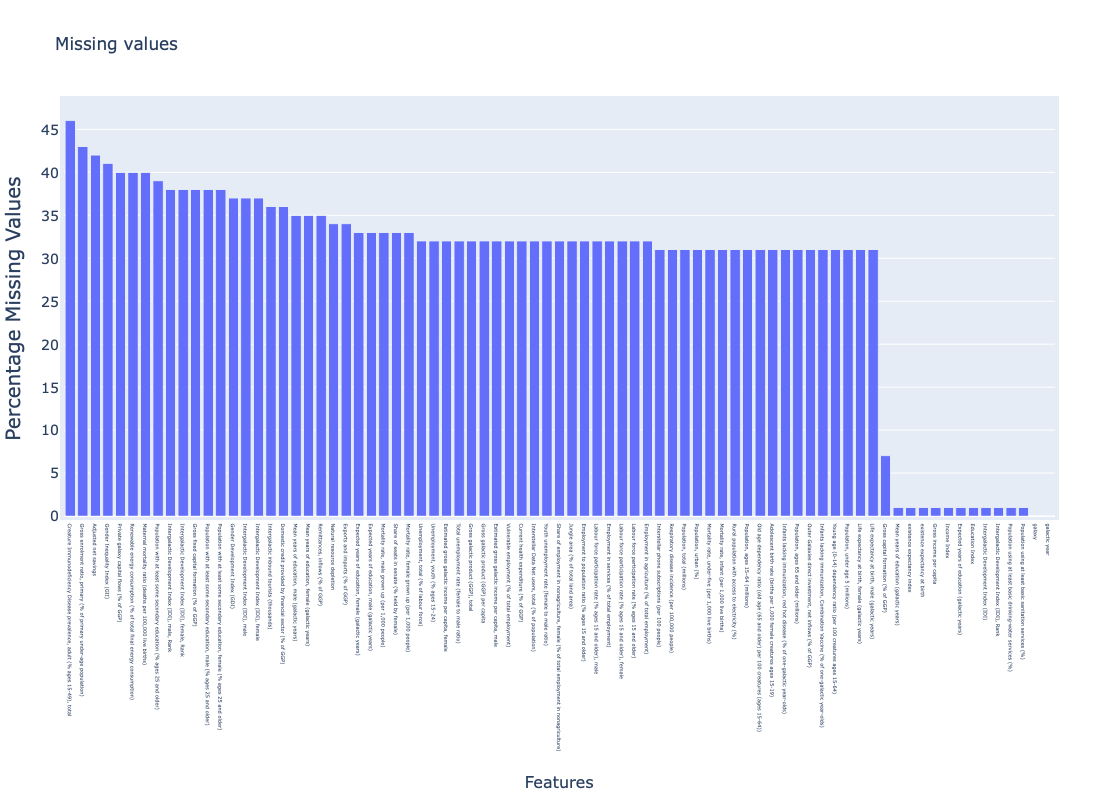

In [186]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=miss_values.index, y=miss_values.iloc[:, 2])])
fig.update_layout(title_text='Missing values',
                  xaxis_tickfont_size=14,
                  xaxis=dict(
                            title='Features',
                            titlefont_size=16,
                            tickfont_size=5),
                  yaxis=dict(
                            title='Percentage Missing Values',
                            titlefont_size=20,
                            tickfont_size=14,
                            ),
                 autosize=True,
                 height=800,
                    margin=dict(
                        l=50,
                        r=50,
                        b=100,
                        t=100,
                        pad=4
                    ))
fig.show()

In [265]:

# x = df.isnull().sum().sort_values(ascending=False).index
# y = df.isnull().sum().sort_values(ascending=False).values/len(df)

# plt.figure(figsize=(25, 30))
# sns.barplot(x, y)
# plt.xticks(rotation=90)
# plt.show()

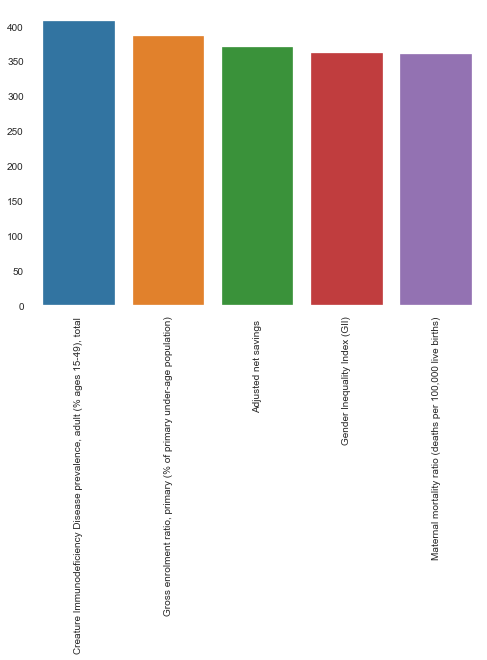

In [62]:
sns.barplot(df.isnull().sum().sort_values(ascending=False).nlargest(5).index, df.isnull().sum().sort_values(ascending=False).nlargest(5).values)
plt.xticks(rotation=90)
plt.show()

In [75]:
# df.corr()
df.corr().iloc[:, 2:].style.applymap(lambda x: 'background-color : red' if x>0.7 else '')

,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
galactic year,0.120242,-0.0106712,0.0368947,0.152214,0.0741522,0.0860045,0.0809051,-0.0154772,0.0819309,0.076947,-0.0255819,-0.0224203,0.0525615,-0.0811606,-0.0793961,0.0311811,0.00884031,0.00922024,0.103728,0.0843093,-0.000402419,-0.0219643,0.0041948,0.015302,-0.0600

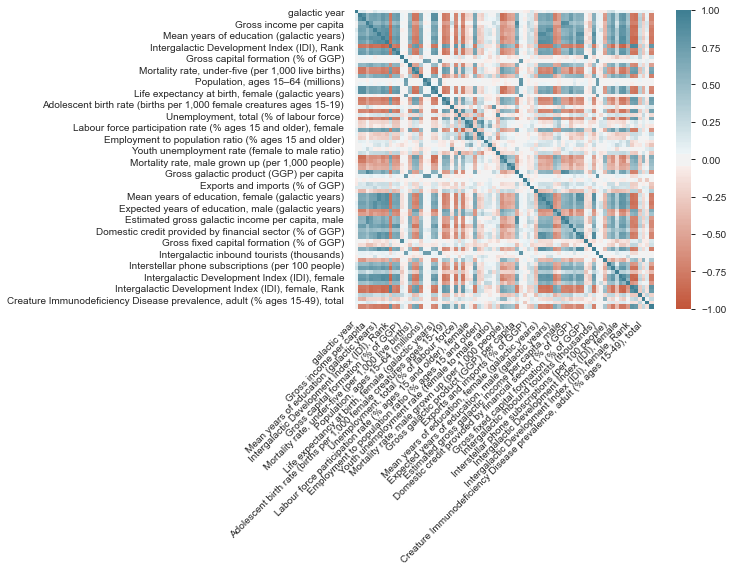

In [65]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [144]:
def missing_table(table):
    # step 1. Columns
    # col 1. non-missing values
    col_1 = []

    # col 2. missing values
    col_2 = []

    # col 3. percentage of missing values
    col_3 = []


    # step 2. Calculation
    index = df.sort_values('galaxy').columns
    col_1 = df.sort_values('galaxy').count()
    col_2 = df.sort_values('galaxy').isnull().sum()
    col_3 = (np.round(df.sort_values('galaxy').isnull().sum()/len(df), 2)*100).values
    # step 3. Appending into datafram
    missing_values_table = pd.DataFrame(index=index, data={'Non-missing values':col_1, 'Missing values':col_2, 'Percentage_missing_values':col_3})
    return missing_values_table.sort_values('Percentage_missing_values', ascending=False)

In [145]:
miss_values = missing_table(df)

In [152]:
miss_values[miss_values['Percentage_missing_values'] >= 20]

,Non-missing values,Missing values,Percentage_missing_values
"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",482,408,46.0
"Gross enrolment ratio, primary (% of primary under-age population)",504,386,43.0
Adjusted net savings,519,371,42.0
Gender Inequality Index (GII),529,361,41.0
Private galaxy capital flows (% of GGP),536,354,40.0
...,...,...,...
"Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",615,275,31.0
Young age (0-14) dependency ratio (per 100 creatures ages 15-64),610,280,31.0
"Population, under age 5 (millions)",610,280,31.0
"Life expectancy at birth, female (galactic years)",610,280,31.0


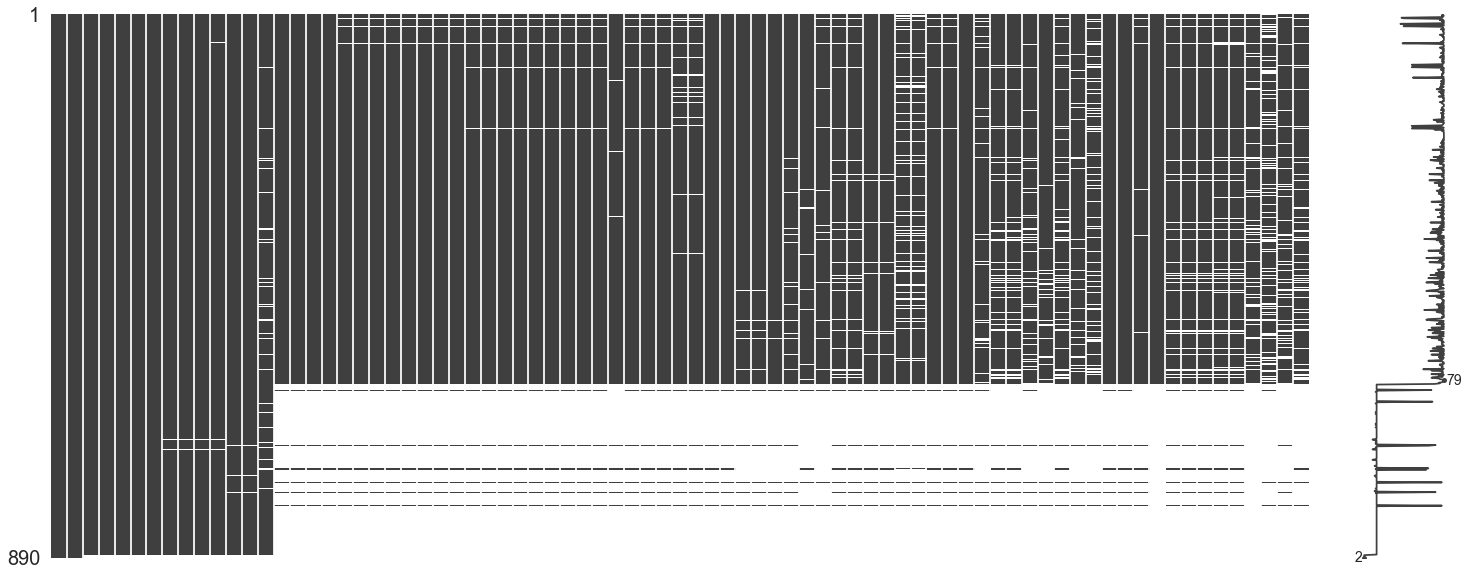

In [207]:
msno.matrix(df.sort_values('Current health expenditure (% of GGP)', ascending=False))

In [205]:
df.isnull().sum().tail(10)

Current health expenditure (% of GGP)                                        284
Intergalactic Development Index (IDI), female                                330
Intergalactic Development Index (IDI), male                                  330
Gender Development Index (GDI)                                               330
Intergalactic Development Index (IDI), female, Rank                          341
Intergalactic Development Index (IDI), male, Rank                            341
Adjusted net savings                                                         371
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    408
Private galaxy capital flows (% of GGP)                                      354
Gender Inequality Index (GII)                                                361
dtype: int64

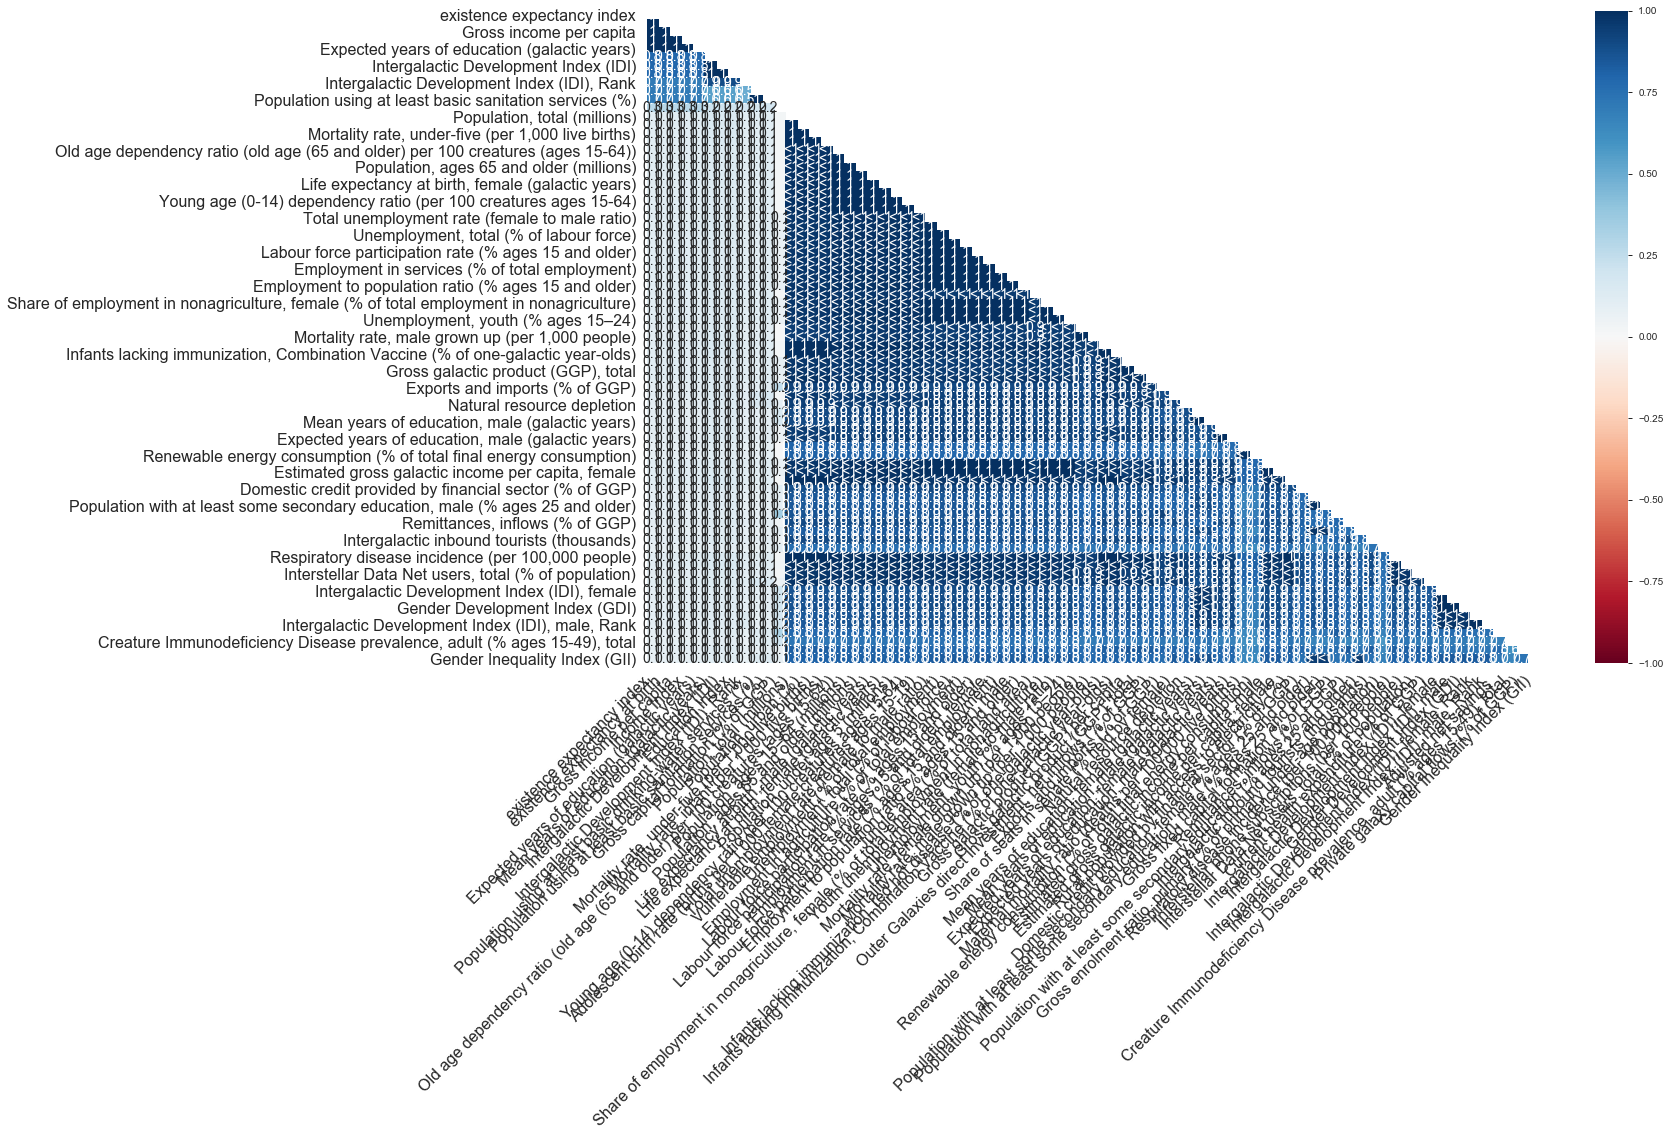

In [191]:
msno.heatmap(df)

In [227]:
# index with most missing values
ind_list = df[df['Current health expenditure (% of GGP)'].isnull()].index.to_list()

# indices with least missing values
ind_list_not = df[df['Current health expenditure (% of GGP)'].notnull()].index.to_list()

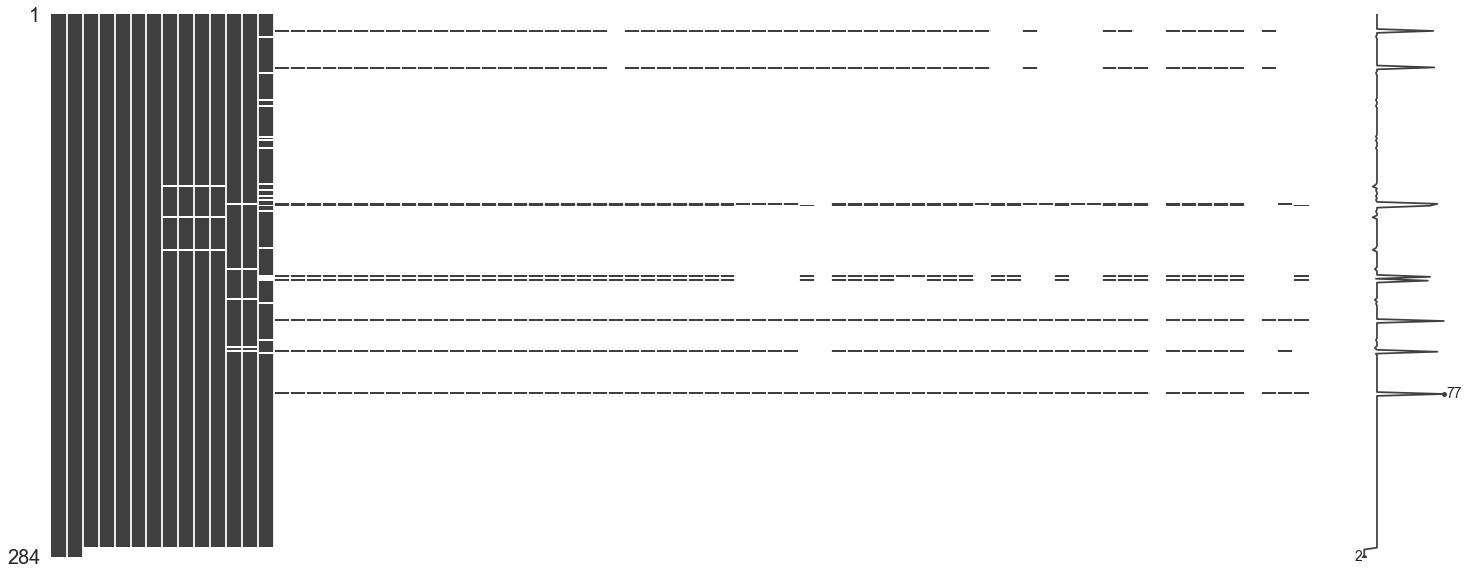

In [225]:
msno.matrix(df.ix[ind_list])

In [263]:
# anomaly detected based on above matrix
df.ix[df.ix[ind_list].iloc[:, 14][df.ix[ind_list].iloc[:, 14].notnull()].index.to_list()]

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
14,1012036,UGC 8651 (DDO 181),0.612233,69.209953,13851.466576,0.564426,8.571510,9.887056,0.569860,0.551509,...,NaN,0.518329,0.645659,0.955325,216.149319,206.575420,NaN,5.375744,NaN,NaN
56,1013042,UGC 8651 (DDO 181),0.682547,62.884063,12557.419740,0.630117,9.714633,7.969413,0.625311,0.657495,...,NaN,0.550545,0.588414,0.987284,192.287153,200.449079,NaN,6.814370,NaN,NaN
287,1010025,UGCA 438 (ESO 407-018),0.872481,78.254756,26099.250335,0.635553,16.605943,12.445550,0.882191,0.692478,...,NaN,0.857688,0.836418,0.957324,170.324248,130.491213,NaN,NaN,19.631157,NaN
290,1014049,HIPASS J1247-77,0.873657,72.544015,26528.417056,0.702141,10.965469,8.029979,0.776140,0.599210,...,NaN,0.602074,0.697877,0.923366,164.861795,197.492345,NaN,NaN,NaN,0.814640
421,1015056,HIPASS J1247-77,0.937613,76.636879,18984.967516,0.631354,13.199089,6.987225,0.810327,0.626858,...,NaN,0.649947,0.685027,0.927495,204.597494,162.049239,NaN,NaN,NaN,0.848263
435,1016064,HIPASS J1247-77,0.941734,79.610988,17845.144762,0.638149,12.961131,8.862241,0.854726,0.541020,...,NaN,0.584743,0.704076,0.878284,175.217580,182.322357,NaN,NaN,NaN,0.759573
495,1011030,"Sextans A (92205, DDO 75)",0.966810,87.976120,30929.743886,0.897617,18.766332,12.616494,1.029032,1.032065,...,NaN,0.958468,1.008513,0.989972,90.679644,80.667125,NaN,6.471423,5.267360,0.458412
530,1011030,UGCA 438 (ESO 407-018),0.981185,90.646717,23285.892083,0.856907,17.771021,12.667030,0.919706,0.809437,...,NaN,0.723812,0.890670,0.892339,143.508914,153.272621,NaN,NaN,12.756318,NaN
601,1010025,"Sextans A (92205, DDO 75)",0.999574,80.467804,29659.498608,1.048264,19.355852,15.133975,0.917601,0.884645,...,NaN,0.994824,0.988973,1.045265,84.935374,81.733938,NaN,6.470475,3.671146,0.404309


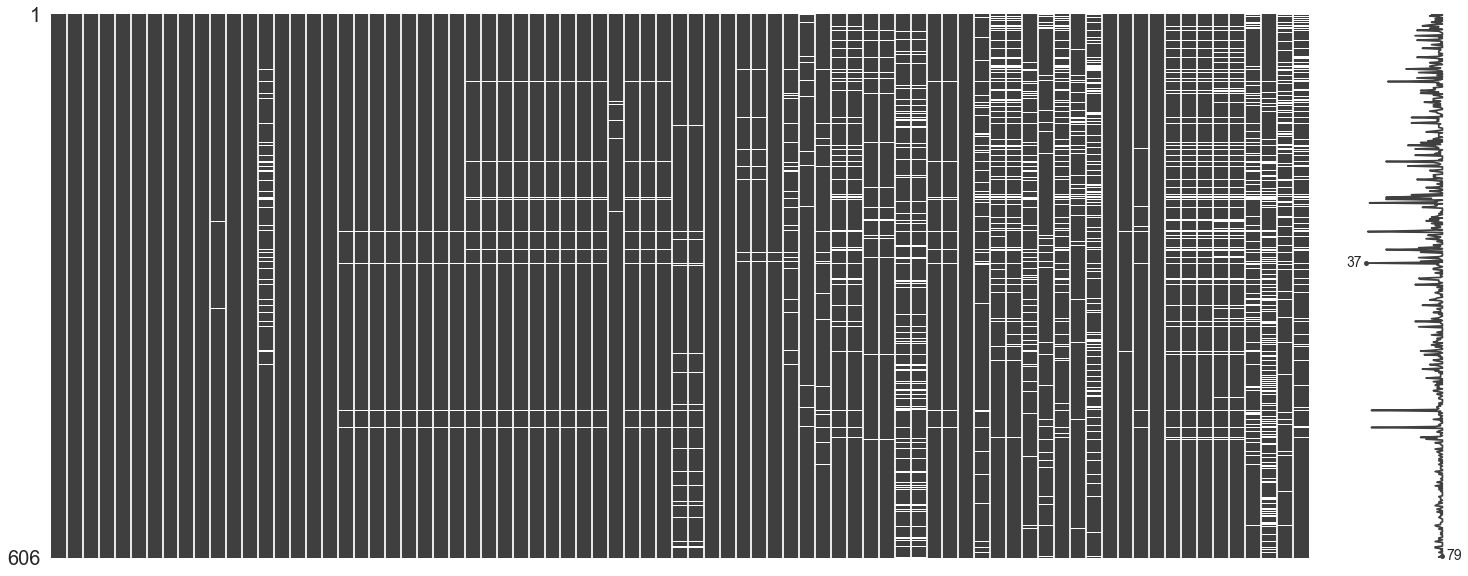

In [228]:
msno.matrix(df.ix[ind_list_not])

In [247]:
df_copy = df.copy()